<a href="https://colab.research.google.com/github/Vennylts/Loan-Repayment-Prediction/blob/main/Loan_Repayment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Business Understanding***
*   Main Goal: Predicting the loan risk or quality (loan repayment) on a given applicant.
*   Objective: Build a binary classification model to predict the loan repayment.


# **1.0 Data Preparation**

To initiate the program, the basic Python libraries are imported, which are as follows:

*   **Pandas**: A robust library for handling and analysing data, offering efficient data structures and functions for working with organised data.
*   **NumPy**: A crucial package for scientific computations, providing efficient data structures and operations for multi-dimensional arrays and mathematical operations, making it indispensable for numerical computing tasks.
*   **Matplotlib**: A popular data visualisation library in Python that facilitates the creation of diverse plots and charts, enabling effective data exploration and communication.
*   **Seaborn**: A data visualisation library that extends Matplotlib, offering a more advanced interface for creating visually appealing and informative statistical graphics.

In [ ]:
# Importing Python libraries into the IDE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset is read and imported as the 'loan' dataframe, using Pandas library 'pd' and 'read_csv()' method. Then, the 'loan' dataframe is displayed as a table to check if the dataset is loaded successfully.

In [ ]:
# Reading loan dataset
loan = pd.read_csv('loan.csv')

# Display table
loan

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577677,LL-I-12122269,801262d04720d32040612759857f4147,B,590.0,2016-11-08T17:32:33.554000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1292.41,NV,bvMandatory,3,NaN,58220cdde4b051c58d919c1f,1
577678,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,490.0,2017-01-24T22:20:59.818000,False,NaN,0.0,False,0,Withdrawn Application,1000.0,2592.39,MO,lead,25,NaN,5887d349e4b08f249ac45e2f,1
577679,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,590.0,2016-02-02T03:05:47.797000,False,NaN,0.0,False,0,Withdrawn Application,300.0,844.75,IN,bvMandatory,6,NaN,550b1f59e4b0d4592e28c84e,1
577680,LL-I-01253468,c3b35307cb36116bf59574f9138d3dad,B,550.0,2015-05-21T20:19:49.639000,False,NaN,0.0,False,0,Withdrawn Application,300.0,770.80,OH,organic,6,NaN,NaN,0


The underwriting dataset is also imported as 'underwriting' dataframe, and similarly displayed to make sure everything is in good shape.

The 'low_memory' parameter is used to allow pandas to read the entire file into memory at once, inferring the data types more accurately.

In [ ]:
# Reading underwriting dataset
underwriting = pd.read_csv('clarity_underwriting_variables.csv', low_memory=False)

# Display table
underwriting

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,677.0,58cc5706e4b0b0437e26b19c
49748,6.0,4.0,1.0,4.0,11.0,4.0,1.0,4.0,17.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,16.0,640.0,58cc5763e4b0b0437e272d38
49749,4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,5.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,576.0,58cc57d4e4b0b0437e278bff
49750,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,830.0,58cc5916e4b0b0437e2b6e07



A strategic decision to **exclude the payment.csv data** from the model training process is made **to avoid potential target leakages**. By doing so, it is ensured that the model evaluates the risk of loan applications based solely on the information available at the time of application, without access to future repayment data. While it is acknowledged that payment.csv could provide valuable insights into client reliability, it is believed that the existing features are sufficient to capture similar information.

# **2.0 Merging Dataset**

Both the 'loan' and 'underwriting' dataframes are merged based on the common id.

Then, the dataframe is filtered to include only funded loans (where isFunded = 1). By focusing only on funded loans, the model can be trained on relevant data points, enhancing its accuracy in predicting default risk for similar loan applicants.

In [ ]:
# Merge dataframes
df = loan.merge(underwriting, left_on='clarityFraudId', right_on='underwritingid', how='left')

# Filter by funded loans
df = df[df['isFunded'] == 1]

# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,True,2016-11-29T20:30:40.640000,2.0,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,...,(U) Unlisted,match,NaN,NaN,NaN,NaN,match,1.0,658.0,58b6eef8e4b0b6fca82fd426
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,...,(P) Pager,match,NaN,NaN,NaN,NaN,match,1.0,624.0,578f9346e4b0810ad5e7b72e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01T16:57:49.231000,True,2016-12-01T17:28:21.872000,3.0,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14T19:43:08.685000,True,2017-01-14T20:00:10.426000,0.0,True,1,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,700.0,587a7f49e4b08f2485d48358
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22T01:10:50.110000,True,2016-06-22T21:46:54.359000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,806.0,5769e592e4b0ab6c50364d45
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30T15:49:39.785000,True,2016-12-30T16:00:12.500000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,769.0,58668211e4b08f246e282356


For loan repayment prediction, it is assumed that 'clearfraudscore' is sufficient to summarize the findings of the underwriting of each applicant, as most of the columns from the 'underwriting' dataset are more relevant to fraud detection.

To verify the relevancy of 'clearfraudscore' column, the description of the 'clearfraudscore' column is read and printed out from the 'clarity_underwriting_dictionary' that records the details of each column in 'underwriting' dataset.

In [ ]:
# Print clearfraudscore description
underwriting_var_columns = pd.read_csv('clarity_underwriting_dictionary.csv')
cfs_desc = underwriting_var_columns[underwriting_var_columns['fieldName_in_file'] == 'clearFraudScore']['Description'].values[0]
print(f'Clear Fraud Score: {cfs_desc}.')

Clear Fraud Score: fraud score provided by clarity. Higher score suggests lower default probability.


Then, only the relevant features are selected for brevity of the data.

In [ ]:
# Feature selection
df = df[['loanId',
         'anon_ssn',
         'payFrequency',
         'apr',
         'applicationDate',
         'originatedDate',
         'nPaidOff',
         'loanStatus',
         'loanAmount',
         'originallyScheduledPaymentAmount',
         'state',
         'leadType',
         'leadCost',
         'fpStatus',
         'hasCF',
         'clearfraudscore']]
# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,hasCF,clearfraudscore
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,1,879.0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,MO,organic,0,Checked,0,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,NJ,lead,40,Checked,1,658.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,MO,organic,0,Checked,1,835.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,CA,bvMandatory,10,Checked,1,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,CA,rc_returning,0,Checked,0,NaN
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,AL,lead,25,Checked,1,700.0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,WI,lead,40,Checked,1,806.0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30T15:49:39.785000,2016-12-30T16:00:12.500000,0.0,New Loan,600.0,1868.88,IN,lead,25,Checked,1,769.0


# **3.0 Data Wrangling**

The dataframe is proceeded for data wrangling which includes data cleaning and replacing the missing values, so that the dataset is consistent and suitable for analysis.

**3.1 Impute Numerical Variables**

The total missing values of the merged dataframe 'df' is displayed.

In [ ]:
df.isnull().sum()

loanId                                 0
anon_ssn                               0
payFrequency                           0
apr                                    0
applicationDate                        0
originatedDate                         0
nPaidOff                              21
loanStatus                             0
loanAmount                             0
originallyScheduledPaymentAmount       0
state                                  0
leadType                               0
leadCost                               0
fpStatus                               9
hasCF                                  0
clearfraudscore                     6894
dtype: int64

**Columns with missing values:**
*   nPaidOff - 21 missing data
*   fpStatus - 9 missing data
*   clearfraudscore - 6894 missing data

Then, the missing values in the 'clearfraudscore' are replaced with median instead of mean because median helps to maintain the central tendency of the data and mitigate the impact of outliers.

Meanwhile, the missing values in 'nPaidOff' are replaced with mode to preserve the distribution of the data and ensure that the imputed values are representative of the majority od the observations in that column.

In [ ]:
# Fill missing values
df.loc[df['clearfraudscore'].isna(), 'clearfraudscore'] = df['clearfraudscore'].median()
df.loc[df['nPaidOff'].isna(), 'nPaidOff'] = df['nPaidOff'].mode()[0]

The 'state' column contains demographic data which is irrelevant to loan default prediction while the 'fpStatus' column contains data that will not be available during model prediction, which will cause target leakege. Therefore, it is advisable to drop both columns

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['state', 'fpStatus'])

**3.2 Turning Categorical Variables to Numerical Variables**

The datatype of each column is observed to identify categorical variables.

In [ ]:
# Print concise summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38982 entries, 1 to 577662
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            38982 non-null  object 
 1   anon_ssn                          38982 non-null  object 
 2   payFrequency                      38982 non-null  object 
 3   apr                               38982 non-null  float64
 4   applicationDate                   38982 non-null  object 
 5   originatedDate                    38982 non-null  object 
 6   nPaidOff                          38982 non-null  float64
 7   loanStatus                        38982 non-null  object 
 8   loanAmount                        38982 non-null  float64
 9   originallyScheduledPaymentAmount  38982 non-null  float64
 10  leadType                          38982 non-null  object 
 11  leadCost                          38982 non-null  int64  
 12  hasCF   

Notice that the columns such as 'applicationDate' and ' originatedDate' that are supposed to be datetime objects are recorded as object datatype. As the format of the dates in those columns are inconsistent, it is important to only retain the only rows with valid datetime vlues and drop the rows with invalid datetime values.

In [ ]:
df['applicationDate'] = pd.to_datetime(df['applicationDate'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')
df['originatedDate'] = pd.to_datetime(df['originatedDate'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')

# Filter rows based on valid date formats
df = df.dropna(subset=['applicationDate', 'originatedDate'])

# Display table
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,leadType,leadCost,hasCF,clearfraudscore
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,3000.0,6395.19,prescreen,0,1,879.0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28 19:54:22.982,2016-11-29 20:30:40.640,2.0,New Loan,350.0,893.88,organic,0,0,693.0
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01 15:55:41.823,2017-03-01 16:15:13.016,0.0,New Loan,400.0,1364.87,lead,40,1,658.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,Paid Off Loan,1250.0,3313.78,organic,0,1,835.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,800.0,2432.08,bvMandatory,10,1,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,Paid Off Loan,600.0,1670.18,rc_returning,0,0,693.0
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,Paid Off Loan,375.0,1042.40,lead,25,1,700.0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,Paid Off Loan,400.0,664.12,lead,40,1,806.0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30 15:49:39.785,2016-12-30 16:00:12.500,0.0,New Loan,600.0,1868.88,lead,25,1,769.0


**Ordinal Encoding** is applied on 'payFrequency' column to map the categorical values ('W', 'B', 'S', 'M', 'I') to numerical values (0, 1, 2, 3, 4) based on their order, helping to preserve the ordinal relationship between the categories.

As the 'leadType' column contains categorical variables without an inherent order, **One-Hot Encoding** is suitable to be performed on the column to create dummy variables for each category. After that, the True and False string values are replaced with 1 and 0 in all columns of the 'leadType'.

In [ ]:
# Ordinal encoding
df['payFrequency'] = df['payFrequency'].map({'W': 0,
                                             'B': 1,
                                             'S': 2,
                                             'M': 3,
                                             'I': 4})

# One-hot encoding
df = pd.get_dummies(df, columns=['leadType'])

# Replace True with 1 and False with 0 in all columns
df = df.replace({True: 1, False: 0})

# Display table
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,3000.0,6395.19,...,0,0,0,0,0,0,0,1,0,0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,1,475.0,2016-11-28 19:54:22.982,2016-11-29 20:30:40.640,2.0,New Loan,350.0,893.88,...,0,0,0,0,0,0,1,0,0,0
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,0,645.0,2017-03-01 15:55:41.823,2017-03-01 16:15:13.016,0.0,New Loan,400.0,1364.87,...,0,0,0,0,1,0,0,0,0,0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,Paid Off Loan,1250.0,3313.78,...,0,0,0,0,0,0,1,0,0,0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,800.0,2432.08,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,Paid Off Loan,600.0,1670.18,...,0,0,0,0,0,0,0,0,1,0
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,Paid Off Loan,375.0,1042.40,...,0,0,0,0,1,0,0,0,0,0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,Paid Off Loan,400.0,664.12,...,0,0,0,0,1,0,0,0,0,0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,1,625.0,2016-12-30 15:49:39.785,2016-12-30 16:00:12.500,0.0,New Loan,600.0,1868.88,...,0,0,0,0,1,0,0,0,0,0


**3.3 Feature Engineering**

The target variable is created to represent the default status of a loan application. The 'loanStatus' column is suitable to give an overview of the outcomes of each application.

In [ ]:
# Perform a normalized count of unique values in loanStatus
df['loanStatus'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

loanStatus
Paid Off Loan                  29.32%
External Collection            29.06%
New Loan                       20.82%
Internal Collection            14.28%
Returned Item                   3.04%
Settlement Paid Off             1.81%
Settled Bankruptcy              0.83%
Pending Paid Off                0.43%
Charged Off Paid Off            0.41%
Charged Off                     0.00%
Settlement Pending Paid Off     0.00%
Name: proportion, dtype: object

Based on the unique values of 'loanStatus', it can be identified that 'Paid Off Loan' and 'Settlement Paid Off' are **favourable loan outcomes** while 'Settled Bankruptcy' and 'Charged Off' are **unfavourable outcomes**. All the other statuses are deemed to be irrelevant, so the rows consisting them will be dropped.

Binary target column is created to streamline analysis, in which:
*   (status == 1) indicating favourable outcome
*   (status == 0) indicating unfavourable outcome


In [ ]:
# Map loanStatus to status (0: loan default, 1: loan not default)
def target_encoding(x):
    labels = {0: ['Settled Bankruptcy', 'Charged Off'],
              1: ['Paid Off Loan', 'Settlement Paid Off']}
    for label, status in labels.items():
        if x in status:
            return label
df['status'] = df['loanStatus'].map(target_encoding)

# Drop rows with no target label (implying their status is ongoing)
df = df[df['status'].notna()].reset_index(drop=True)

# Display results
df['status'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')

status
1.0    97.39%
0.0     2.61%
Name: proportion, dtype: object

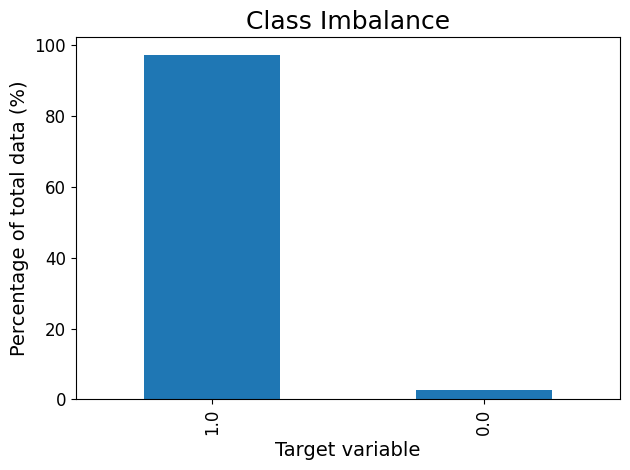

In [ ]:
df['status'].value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).plot(kind='bar')
plt.title('Class Imbalance', fontsize=18)
plt.xlabel('Target variable', fontsize=14)
plt.ylabel('Percentage of total data (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The class imbalance occurs in the dataset, that is the **not default loans (97.38%)** have significantly more representation than the **defaulted loans (2.62%)**. Therefore, oversampling will be employed in data preporcessing to balance the imbalance dataset.

After extracted necessary information to create the target variable, it is safe to drop the 'loanStatus' column. The 'hasCF' column will be dropped as well, since it has no description to the column found in the data dictionary provided for the assessment, and the purpose of the column remains unknown.

In [ ]:
# Drop irrelevant columns
df.drop(columns=['loanStatus', 'hasCF'], inplace=True)

By calculating the difference between 'applicationDate' and 'originatedDate' in hours, a potential feature named 'time_to_originate' could be created to provide information on the time taken for the loan to be originated. This insight may be relevant to assesss the quality of the application.

In [ ]:
# Calculate hours between applicationDate & originatedDate
df['time_to_originate'] = (df['originatedDate'] - df['applicationDate']).dt.seconds / 3600

# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,...,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,status,time_to_originate
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,3000.0,6395.19,0,...,0,0,0,0,0,1,0,0,1.0,17.695000
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,1250.0,3313.78,0,...,0,0,0,0,1,0,0,0,1.0,0.199167
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,800.0,2432.08,10,...,0,0,0,0,0,0,0,0,1.0,5.949444
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,0,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,300.0,422.64,0,...,0,0,0,0,1,0,0,0,1.0,12.104722
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,0,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,300.0,896.87,6,...,0,0,0,0,0,0,0,0,1.0,1.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12433,LL-I-15390953,c81e355845a451b77c29b6515efa2578,1,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,1500.0,5111.56,25,...,0,0,1,0,0,0,0,0,1.0,0.560833
12434,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,600.0,1670.18,0,...,0,0,0,0,0,0,1,0,1.0,0.508889
12435,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,375.0,1042.40,25,...,0,0,1,0,0,0,0,0,1.0,0.283611
12436,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,400.0,664.12,40,...,0,0,1,0,0,0,0,0,1.0,20.601111


A new feature 'time_since_last' is created to represent the time between consecutive loan applications by a given person measured by days. The value for non-returning clients will be -1.

In [ ]:
# Create a copy of df and sort the values by ssn & applicationDate
tmp = df.sort_values(by=['anon_ssn', 'applicationDate']).copy()

# Compute the days between consecutive applications
df['time_since_last'] = tmp.groupby('anon_ssn')['applicationDate'].diff().dt.total_seconds() / (24 * 60 * 60)

# Fill NaN values
df['time_since_last'] = df['time_since_last'].fillna(-1)

# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,...,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,status,time_to_originate,time_since_last
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,3000.0,6395.19,0,...,0,0,0,0,1,0,0,1.0,17.695000,-1.000000
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,1250.0,3313.78,0,...,0,0,0,1,0,0,0,1.0,0.199167,13.688801
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,800.0,2432.08,10,...,0,0,0,0,0,0,0,1.0,5.949444,-1.000000
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,0,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,300.0,422.64,0,...,0,0,0,1,0,0,0,1.0,12.104722,98.405253
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,0,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,300.0,896.87,6,...,0,0,0,0,0,0,0,1.0,1.722222,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12433,LL-I-15390953,c81e355845a451b77c29b6515efa2578,1,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,1500.0,5111.56,25,...,0,1,0,0,0,0,0,1.0,0.560833,-1.000000
12434,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,600.0,1670.18,0,...,0,0,0,0,0,1,0,1.0,0.508889,-1.000000
12435,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,375.0,1042.40,25,...,0,1,0,0,0,0,0,1.0,0.283611,-1.000000
12436,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,400.0,664.12,40,...,0,1,0,0,0,0,0,1.0,20.601111,-1.000000


# **4.0 Exploratory Data Analysis (EDA)**

In [ ]:
# Make a copy for exploratory analysis/visualization
data = df.copy()
# Print descriptive stats for numeric columns
data[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'clearfraudscore', 'time_to_originate', 'time_since_last']].describe()

,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,time_to_originate,time_since_last
count,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000
mean,508.939249,0.589162,629.435601,1662.069854,12.116739,709.565525,7.034490,26.656484
std,117.343707,1.388527,451.994710,1203.422934,24.755052,116.010169,7.634345,72.316432
min,0.000000,0.000000,100.000000,188.410000,0.000000,177.000000,0.000000,-1.000000
25%,390.000000,0.000000,350.000000,950.352500,0.000000,655.000000,0.715000,-1.000000
50%,565.000000,0.000000,500.000000,1303.710000,3.000000,693.000000,3.217083,-1.000000
75%,590.000000,1.000000,700.000000,1943.700000,10.000000,794.000000,13.676667,-1.000000
max,705.590000,21.000000,4687.000000,12550.080000,200.000000,961.000000,23.998333,640.788635


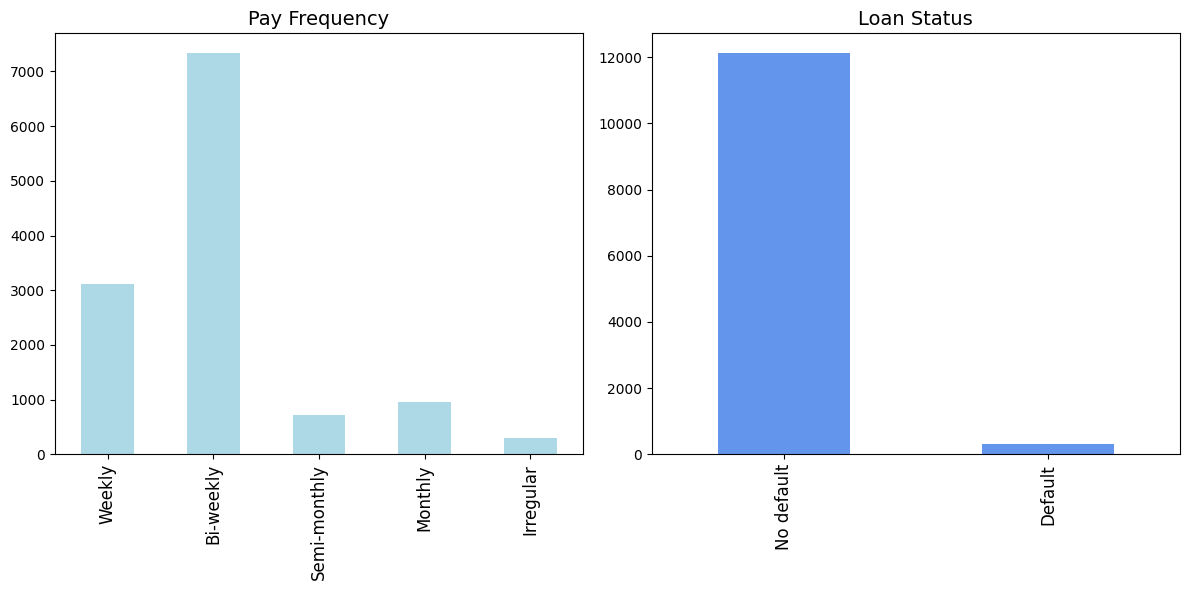

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

data.groupby(['payFrequency']).size().plot(kind='bar', color='lightblue', ax=ax[0])
ax[0].set_title('Pay Frequency', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_xticks(range(len(['Weekly', 'Bi-weekly', 'Semi-monthly', 'Monthly', 'Irregular'])))
ax[0].set_xticklabels(['Weekly', 'Bi-weekly', 'Semi-monthly', 'Monthly', 'Irregular'], fontsize=12)

data['status'].value_counts().plot(kind='bar', color='cornflowerblue', ax=ax[1])
ax[1].set_title('Loan Status', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_xticklabels(['No default', 'Default'], fontsize=12)

plt.tight_layout()
plt.show()

From the graph 'Pay Frequency' above shows that the majority of the funded loan applications are weekly or bi-weekly repayment schedule.

The 'Loan Status' graph also suggests the class imbalance exists in the dataset, which will be addressed using oversampling during data preprocessing.

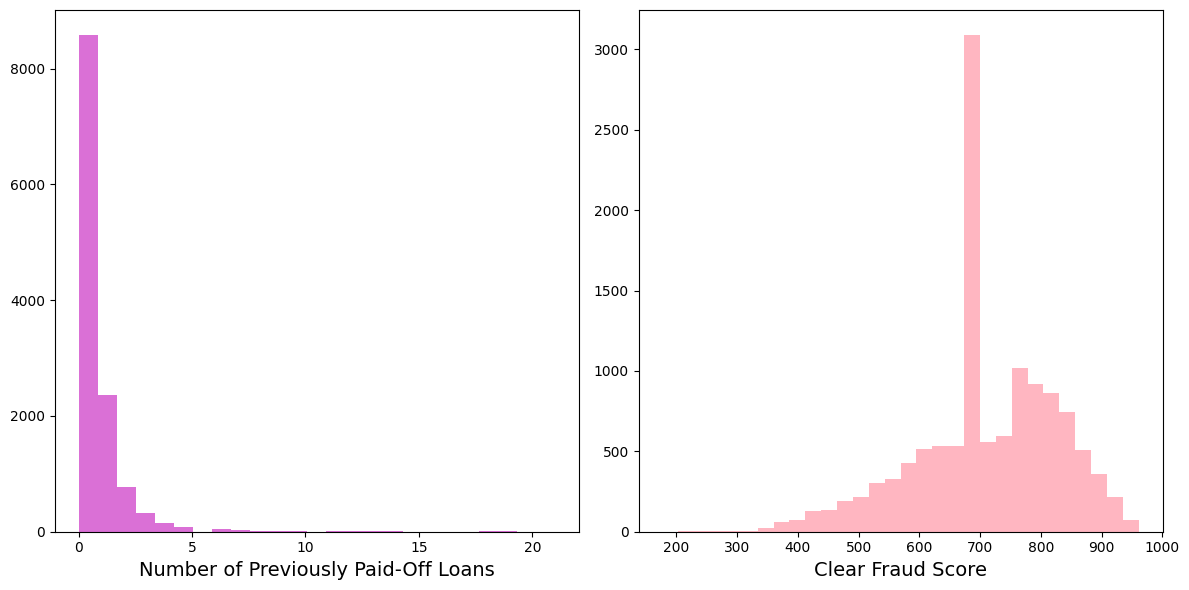

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

data['nPaidOff'].plot(kind='hist', bins=25, color='orchid', ax=ax[0])
data['clearfraudscore'].plot(kind='hist', bins=30, color='lightpink', ax=ax[1])

ax[0].set_xlabel('Number of Previously Paid-Off Loans', fontsize=14)
ax[0].set_ylabel('')

ax[1].set_xlabel('Clear Fraud Score', fontsize=14)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

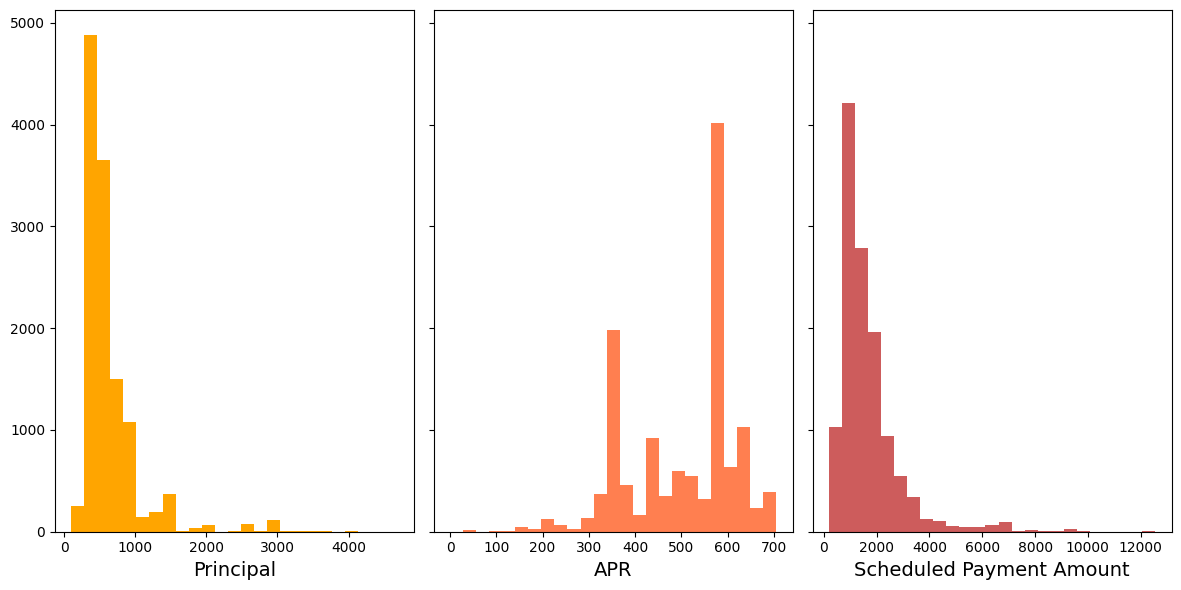

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

data['loanAmount'].plot(kind='hist', bins=25, color='orange', ax=ax[0])
data['apr'].plot(kind='hist', bins=25, color='coral', ax=ax[1])
data['originallyScheduledPaymentAmount'].plot(kind='hist', bins=25, color='indianred', ax=ax[2])

ax[0].set_xlabel('Principal', fontsize=14)
ax[0].set_ylabel('')
ax[1].set_xlabel('APR', fontsize=14)
ax[2].set_xlabel('Scheduled Payment Amount', fontsize=14)

plt.tight_layout()
plt.show()

From all the graphes above show that all 3 columns containing the financial terms of the loan are heavily skewed. Therefore, these data should be normalize during data preprocessing step.

The features relating to time-components of the application are then explored to investigate the trends of the data.

Temporal features are extracted from the 'applicationDate' column to create new features that represent year, month, day, day of week, and quarter respectively.

In [ ]:
# Perform aggregations
data['application_year'] = data['applicationDate'].dt.year
data['application_month'] = data['applicationDate'].dt.month
data['application_day'] = data['applicationDate'].dt.day
data['application_day_of_week'] = data['applicationDate'].dt.day_of_week
data['application_quarter'] = data['applicationDate'].dt.quarter

days = {0: 'M', 1: 'T', 2: 'W', 3: 'R', 4: 'F', 5: 'S', 6: 'SS'}
data['application_day_of_week'] = data['application_day_of_week'].map(days)

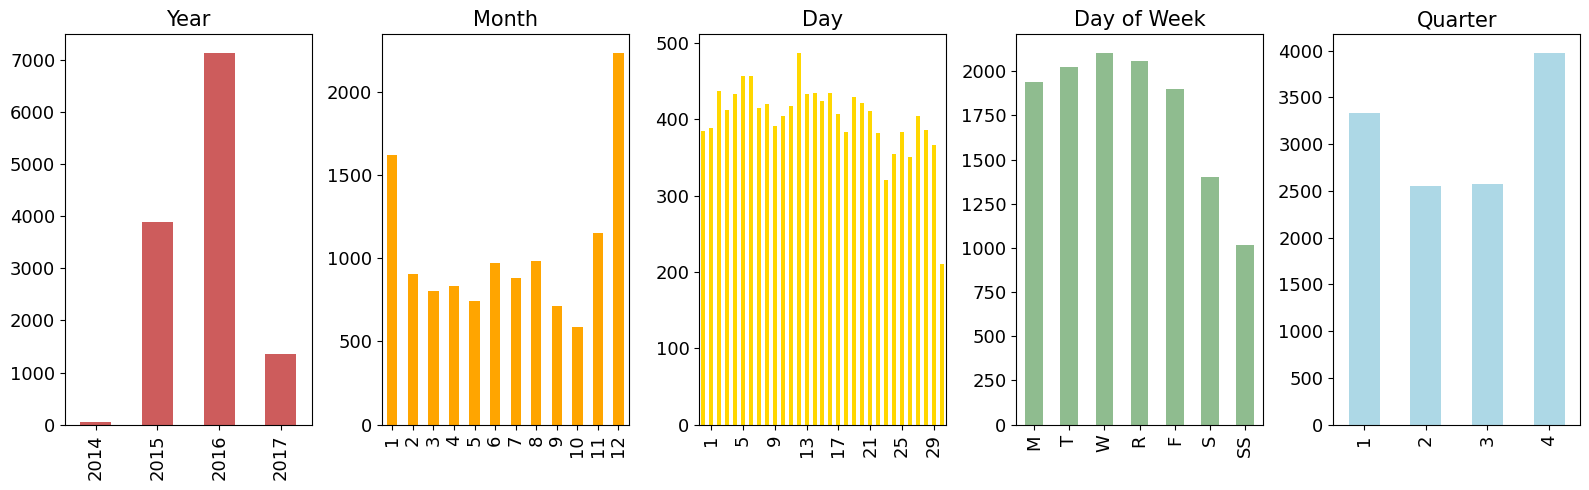

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(16, 5))

data.groupby(['application_year']).size().plot(kind='bar', color='indianred', ax=ax[0])
data.groupby(['application_month']).size().plot(kind='bar', color='orange', ax=ax[1])
data.groupby(['application_day']).size().plot(kind='bar', xticks=range(1, 31, 4), color='gold', ax=ax[2])
data.groupby(['application_day_of_week']).size().reindex(['M', 'T', 'W', 'R', 'F', 'S', 'SS']).plot(kind='bar', color='darkseagreen', ax=ax[3])
data.groupby(['application_quarter']).size().plot(kind='bar', color='lightblue', ax=ax[4])

ax[0].set_title('Year', fontsize=15)
ax[0].set_xlabel('')
ax[1].set_title('Month', fontsize=15)
ax[1].set_xlabel('')
ax[2].set_title('Day', fontsize=15)
ax[2].set_xlabel('')
ax[3].set_title('Day of Week', fontsize=15)
ax[3].set_xlabel('')
ax[4].set_title('Quarter', fontsize=15)
ax[4].set_xlabel('')

for i in range(5):
    ax[i].tick_params(axis='both', which='both', labelsize=13)

plt.tight_layout()
plt.show()

Insight from loan data analysis:
*   **Loan Volume by Year:** A significant increase in loan funding observed between 2015 and 2016, despite potentially incomplete data from 2014 and 2017.
*   **Seasonality in Loan Applications:** A seasonal trend is evident, with application peaks near December and January, potentially coinciding with the holiday season. This suggests a potential rise in loan demand during the holiday period. MoneyLion's funding activity reflects this pattern, with higher loan volumes observed in Q1 and Q4 (quarters encompassing December and January).
*   **Loan Applications and Weekends:** The data suggests a potential difference in application behavior between weekdays and weekends. Fewer loan applications seem to be received on weekends compared to weekdays. This might indicate lower submission rates during weekends.

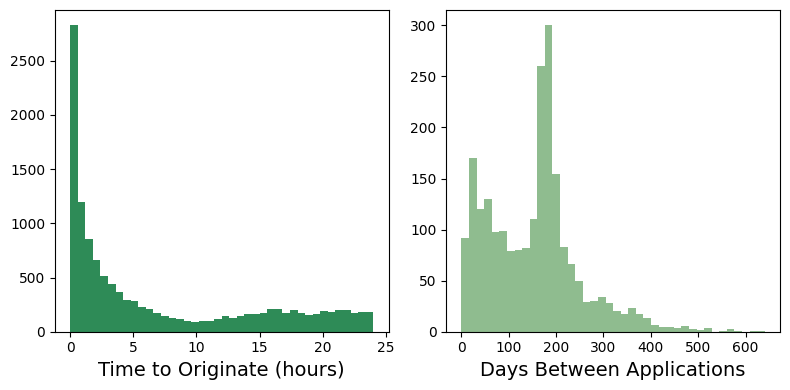

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

data['time_to_originate'].plot(kind='hist', bins=40, color='seagreen', ax=ax[0])

# Exclude non-returning applications
data[data['time_since_last'] >= 0]['time_since_last'].plot(kind='hist', bins=40, color='darkseagreen', ax=ax[1])

ax[0].set_xlabel('Time to Originate (hours)', fontsize=14)
ax[0].set_ylabel('')
ax[1].set_xlabel('Days Between Applications', fontsize=14)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

The 'Time to Originate' graph shows that most of the loan applications are originated within a few hours, and 'Days Between Applications' graph suggests that most returning clients submit another successful application roughly 200 days after their last.

In [ ]:
# Print out the correlation matrix
corr_data = data.select_dtypes(include=['int64', 'float64']).corr()
matrix = corr_data
matrix.corr()

,payFrequency,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,status,time_to_originate,time_since_last
payFrequency,1.000000,-0.153313,-0.017611,0.107546,0.070060,0.083093,0.201458,-0.110163,-0.025579,-0.056589,-0.094074,0.093100,-0.017057,-0.042414,0.181136,0.035323,-0.088603,-0.058417,-0.023960,-0.054813
apr,-0.153313,1.000000,-0.235272,-0.537083,-0.381461,-0.039430,-0.291441,0.342254,-0.286358,0.003752,0.023521,0.086755,-0.201369,-0.276473,-0.469410,0.089330,-0.026032,0.074478,-0.149791,-0.321104
nPaidOff,-0.017611,-0.235272,1.000000,0.052574,0.006655,-0.427322,-0.080343,-0.457527,-0.124463,0.141498,-0.051808,-0.371876,-0.054949,0.603850,-0.058567,0.657079,-0.020859,0.022667,-0.243516,0.548922
loanAmount,0.107546,-0.537083,0.052574,1.000000,0.982187,0.239366,0.622379,-0.500980,0.381564,-0.088222,-0.070466,0.238775,-0.049652,0.055759,0.647878,-0.017872,-0.059939,-0.132216,-0.062698,0.027958
originallyScheduledPaymentAmount,0.070060,-0.381461,0.006655,0.982187,1.000000,0.266773,0.612035,-0.468894,0.415200,-0.096322,-0.070104,0.276131,-0.098522,0.002954,0.584372,0.001057,-0.074440,-0.132224,-0.099777,-0.040530
leadCost,0.083093,-0.039430,-0.427322,0.239366,0.266773,1.000000,0.545369,-0.265441,0.396067,-0.090124,-0.055288,0.903550,-0.055085,-0.466017,-0.071547,-0.228504,-0.069065,-0.101512,-0.061917,-0.387634
clearfraudscore,0.201458,-0.291441,-0.080343,0.622379,0.612035,0.545369,1.000000,-0.627794,0.178010,-0.095434,-0.074336,0.630960,-0.062970,-0.024053,0.362690,-0.086774,-0.084158,-0.073976,-0.117859,-0.066802
leadType_bvMandatory,-0.110163,0.342254,-0.457527,-0.500980,-0.468894,-0.265441,-0.627794,1.000000,-0.076312,0.034371,0.067687,-0.406215,0.043012,-0.535593,-0.227443,-0.172135,0.048812,0.035885,0.171296,-0.450173
leadType_california,-0.025579,-0.286358,-0.124463,0.381564,0.415200,0.396067,0.178010,-0.076312,1.000000,-0.086438,-0.073162,0.120817,-0.054881,-0.089819,0.071609,-0.088939,-0.072051,-0.104652,-0.009133,-0.110698
leadType_express,-0.056589,0.003752,0.141498,-0.088222,-0.096322,-0.090124,-0.095434,0.034371,-0.086438,1.000000,-0.054919,-0.064758,-0.047351,0.009548,-0.060170,0.015422,-0.052343,-0.044991,-0.088640,-0.012330


**Heatmap Correlation**

To visualise the correlation coefficients of each feature. While both integers 1 and -1 show strong correlation between variables, the integer 1 indicates strong positive correlation and -1 means strong negative correlation. Meanwhile, the integer 0 means there is no correlation between the variables. In the heatmap shown above, most of the variables are not correlated with each other as most of the colours are in pale red, which lies closer to the 0 integers.

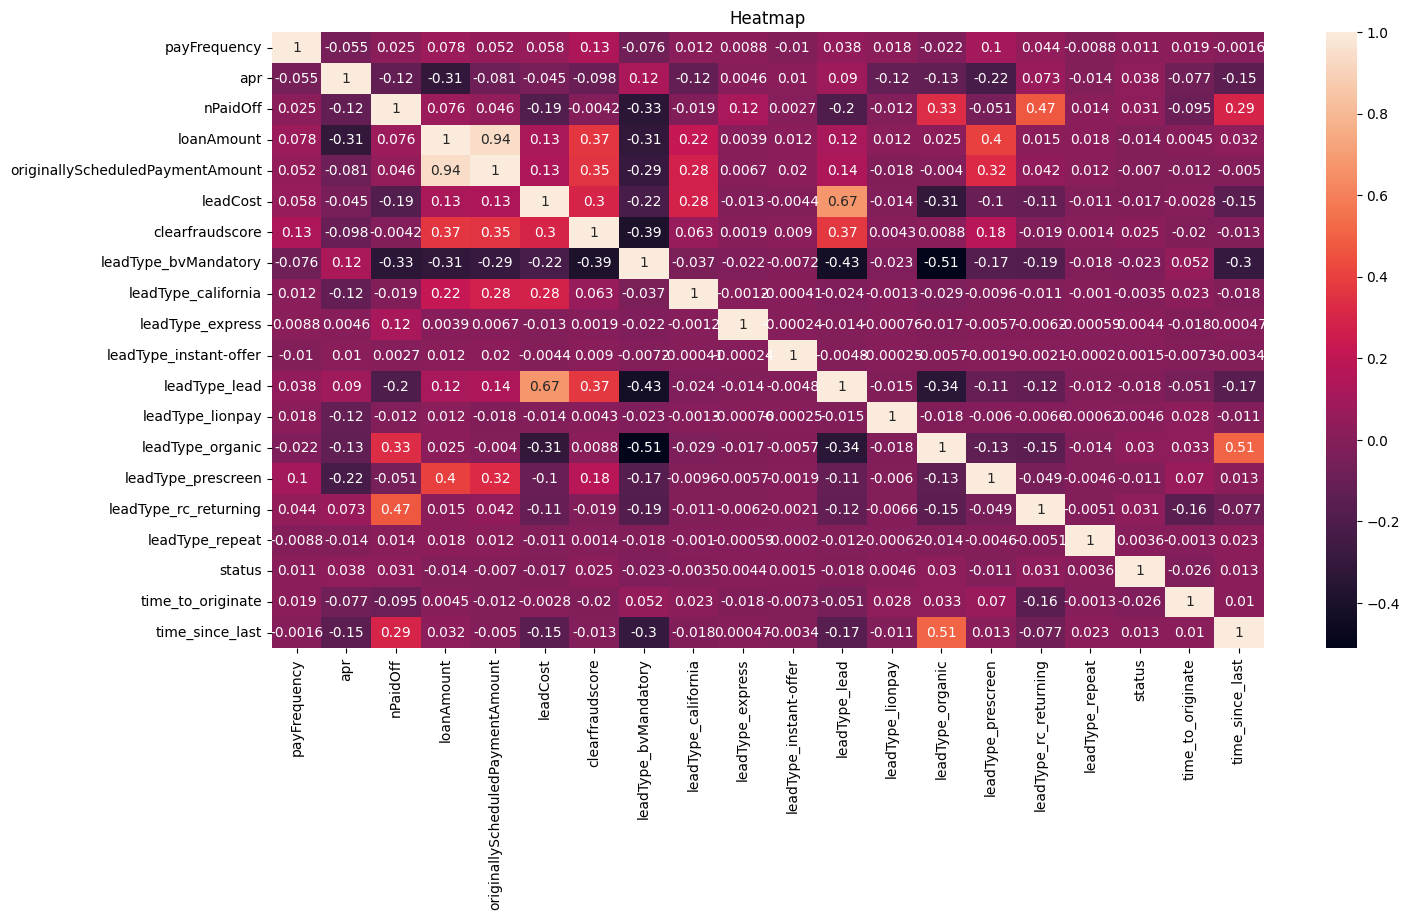

In [ ]:
# Select numeric columns only
columns_numeric = data.select_dtypes(include=['int64', 'float64'])

# Get independent variable column names
independent_variables = columns_numeric.columns.tolist()

# Calculate the correlation matrix for independent variables
independent_corr_matrix = columns_numeric[independent_variables].corr()

# Plot the independent variable heatmap
plt.figure(figsize=(16,8))
sns.heatmap(independent_corr_matrix, annot=True)
plt.title('Heatmap')
plt.show()

From the heatmap, it is shown that the target value is highly correlated with 'loanAmount' and 'originallyScheduledPaymentAmount', both at (0.94) correlation.

# **5.0 Data Preprocessing**

As the time-contextual data has been aggregated into 'time_to_originate' and 'time_since_last' columns, the 'appliationDate' and 'originatedDate' columns can be safely dropped.

In [ ]:
# Drop irrelevant columns
df.drop(columns=['applicationDate', 'originatedDate'], inplace=True)

**5.1 Scaling**

As there exist skewness in the data proven during EDA, the numeric features (except binary and one-hot encoded features) are needed to be scaled.

The scaling of numeric features are as follows:
*   **min-max scaling** to the features containing outliers (loanAmount, originallyScheduledPaymentAmount)
*   **z-score standardization** on the features whose Gaussianity we want to preserve (clearfraudscore)
*   **box-cox transformation** to the positively skewed features (nPaidOff, time_to_originate, leadCost)
*   **logarithmic transform** on the features with bimodal distributions (apr, time_since_last)

As the 'time_since_last' uses -1 inplace of NaN values, the normalization only applied to the positive values in the column.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

# Min-max scaling
scaler = MinMaxScaler()
df[['loanAmount', 'originallyScheduledPaymentAmount']] = scaler.fit_transform(df[['loanAmount', 'originallyScheduledPaymentAmount']])

# Z-score standardization
mean, stdev = df['clearfraudscore'].mean(), df['clearfraudscore'].std()
df['clearfraudscore'] = (df['clearfraudscore'] - mean) / stdev

# Box-cox transformation
cols = ['nPaidOff', 'time_to_originate', 'leadCost']
for col in cols:
    df[col], _ = boxcox(df[col] + 1)

# Logarithmic transform
df['apr'] = np.log(df['apr'])
mask = df['time_since_last'] >= 0
df.loc[mask, 'time_since_last'] = np.log(df.loc[mask, 'time_since_last'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


There is RuntimeWarning suggests that there are zero or negative values present in the data, causing the logarithmic operation to encounter a divide-by-zero error.

In [ ]:
# Specify the normalized features
features = ['loanAmount', 'originallyScheduledPaymentAmount', 'apr', 'time_since_last', 'clearfraudscore', 'nPaidOff', 'leadCost', 'time_to_originate']

# Print descriptive statistics
df[features].describe()

,loanAmount,originallyScheduledPaymentAmount,apr,time_since_last,clearfraudscore,nPaidOff,leadCost,time_to_originate
count,12438.000000,12438.000000,1.243800e+04,12438.0000,1.243800e+04,12438.000000,12438.000000,12438.000000
mean,0.115421,0.119212,-inf,-inf,-6.855212e-17,0.108082,1.113724,1.394805
std,0.098538,0.097351,NaN,NaN,1.000000e+00,0.161946,0.975538,0.904277
min,0.000000,0.000000,-inf,-inf,-4.590680e+00,0.000000,0.000000,0.000000
25%,0.054502,0.061638,5.966147e+00,-1.0000,-4.703512e-01,0.000000,0.000000,0.524913
50%,0.087203,0.090222,6.336826e+00,-1.0000,-1.427937e-01,0.000000,1.192697,1.338976
75%,0.130804,0.141995,6.380123e+00,-1.0000,7.278196e-01,0.328295,1.857820,2.351199
max,1.000000,1.000000,6.559034e+00,6.4627,2.167349e+00,0.397911,3.111782,2.745902


The presence of -inf (negative infinity) and NaN (Not a Number) values in the 'apr' and 'time_since_last' features are shown when printing descriptive statistics for the scaled features. This issue will be addressed during preprocessing to ensure that the data is appropriately transformed to avoid such errors.

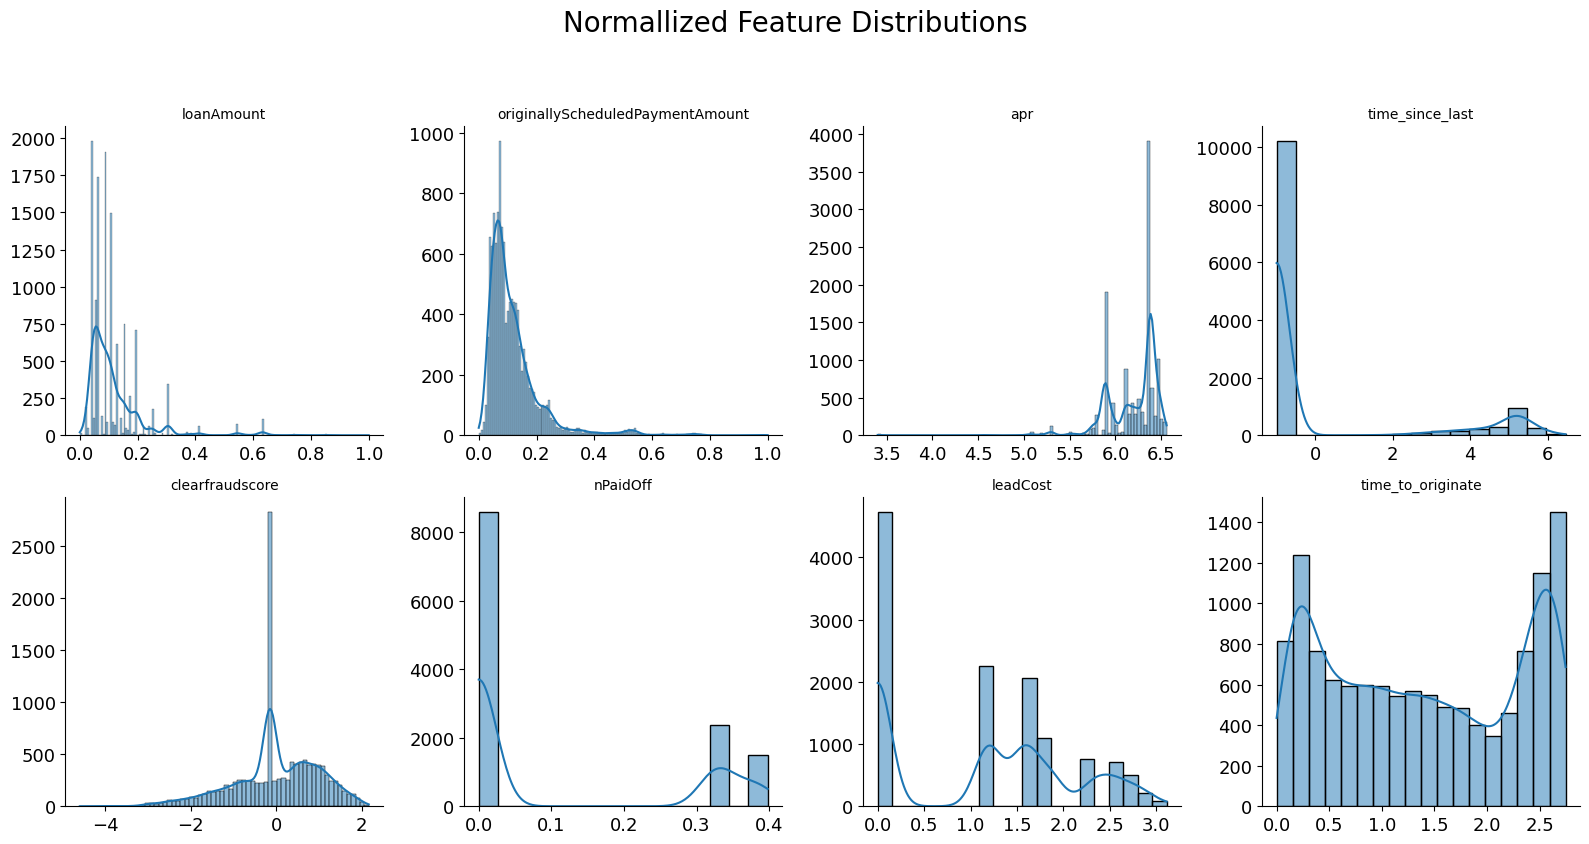

In [ ]:
df_pivot = df[features].melt(var_name='variable', value_name='value')
g = sns.FacetGrid(df_pivot, col='variable', col_wrap=4, height=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value', bins='auto', kde=True)

g.set_titles('{col_name}', fontsize=16)
g.set(xlabel='', ylabel='')
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), fontsize=13)
    plt.setp(ax.get_yticklabels(), fontsize=13)

plt.suptitle('Normallized Feature Distributions', fontsize=20, y=1.05)
g.tight_layout()
plt.show()

From the graphs above, it show that:

*   (loanAmount, originallyScheduledPaymentAmount): nicely distributed over the interval [0, 1] after min-max scaling.

*   (clearfraudscore): remain Gaussian with a mean close to 0 and standard deviation near 1 after z-score transformation.
*   (nPaidOff, time_to_originate, leadCost): are more symmetrically distributed with reduced skewness after box-cox transformation.

*   (apr): appears more Gaussian-like with less skewness than before after logarithmic transformation.

The features' distributions align well with expectations, except for 'time_since_last', where only positive values were normalized, thus visualization is need for the distribution of these positive values separately.

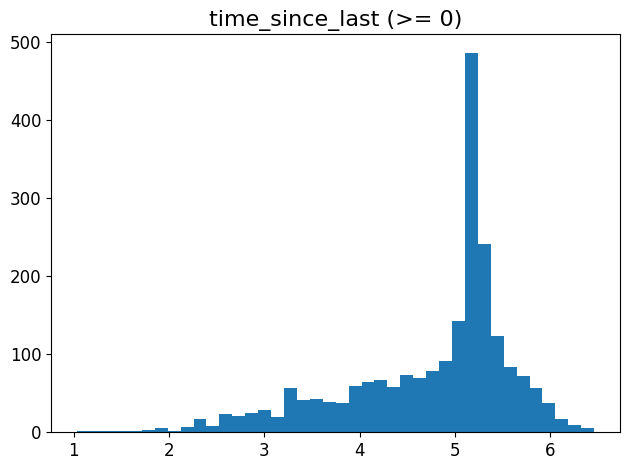

In [ ]:
df[df['time_since_last'] >= 0]['time_since_last'].plot(kind='hist', bins=40)
plt.title('time_since_last (>= 0)', fontsize=16)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

After visualizing the positive values, the graph shows a noticeable improvement from the previous graph.

**5.2 Class Imbalance**

Oversampling is used to balance the data.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Separate the unique identifiers & target variable from the features
X, y = df.drop(['loanId', 'anon_ssn', 'status'], axis=1), df['status']

# Check the class distribution before balancing
print(f'Class distribution before balancing: \n{y.value_counts(normalize=True).apply(lambda x: f"{x * 100:.2f}%")}\n')

# Balance the class distribution using oversampling
ros = RandomOverSampler(random_state=11)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after balancing
print(f'Class distribution after balancing: \n{y_resampled.value_counts(normalize=True).apply(lambda x: f"{x * 100:.2f}%")}\n')

Class distribution before balancing: 
status
1.0    97.39%
0.0     2.61%
Name: proportion, dtype: object

Class distribution after balancing: 
status
1.0    50.00%
0.0    50.00%
Name: proportion, dtype: object



**5.3 Train-Test Split**

Then, the resampled data is splitted into train and test sets, with 80% training and 20% testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=11)

The presence of -inf (negative infinity) and NaN (Not a Number) values in the 'apr' and 'time_since_last' features will lead to potential issues during data analysis or modeling. Therefore, this issue must be addressed during preprocessing.

 The data types of the columns in the 'X_train' are printed to examine their types, and subsequent data cleaning steps will be undertaken to handle these invalid values appropriately.

In [ ]:
print(X_train.dtypes)

payFrequency                          int64
apr                                 float64
nPaidOff                            float64
loanAmount                          float64
originallyScheduledPaymentAmount    float64
leadCost                            float64
clearfraudscore                     float64
leadType_bvMandatory                  int64
leadType_california                   int64
leadType_express                      int64
leadType_instant-offer                int64
leadType_lead                         int64
leadType_lionpay                      int64
leadType_organic                      int64
leadType_prescreen                    int64
leadType_rc_returning                 int64
leadType_repeat                       int64
time_to_originate                   float64
time_since_last                     float64
dtype: object


Then, the infinite values (np.inf and -np.inf) in the 'X_train' are checked using the isin() method and prints the rows containing these values.

In [ ]:
print(X_train[X_train.isin([np.inf, -np.inf])])

       payFrequency  apr  nPaidOff  loanAmount  \
230             NaN  NaN       NaN         NaN   
13806           NaN  NaN       NaN         NaN   
16538           NaN  NaN       NaN         NaN   
16566           NaN  NaN       NaN         NaN   
11361           NaN  NaN       NaN         NaN   
...             ...  ...       ...         ...   
4023            NaN  NaN       NaN         NaN   
7259            NaN  NaN       NaN         NaN   
21584           NaN  NaN       NaN         NaN   
3775            NaN  NaN       NaN         NaN   
10137           NaN  NaN       NaN         NaN   

       originallyScheduledPaymentAmount  leadCost  clearfraudscore  \
230                                 NaN       NaN              NaN   
13806                               NaN       NaN              NaN   
16538                               NaN       NaN              NaN   
16566                               NaN       NaN              NaN   
11361                               NaN       NaN

The infinite values (np.inf and -np.inf) are replaced by NaN, and then fills the NaN values with 0 using the fillna() method to ensure all values are finite.

In [ ]:
# Replace invalid values with finite values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)

# **6.0 Modelling**

(1) [Machine Learning Model for Predicting the Repayment Rate of Loan Takers](https://www.diva-portal.org/smash/get/diva2:1563211/FULLTEXT01.pdf) by Emma Oskarsson (2021).

The paper above (1) experimented with **Linear Discriminant Analysis**, **Logistic Regression**, and **Random Forest Classifier** as the models to compare and find the best performing model on predicting the repayment rate, which is the main goal of the assessment. The evaluation metrics involved AUC-ROC score, sensitivity, and speciality to determine the best performing models. When using the multiclass classification, the LDA model has the worst performance out of all three experimented models for both sensitivity and AUC-ROC ratio metrics. Therefore, binary classification is used for both LR and RF models to improve the results.

After using binary classification, **RF has outperformed** LR with:
*   **0.9695 sensitivity**
*   **0.8058 speciality**
*   **0.9764 AUC-ROC**




[Loan Repayment Prediction Using Machine Learning Algorithms](https://escholarship.org/uc/item/9cc4t85b) by Chang Han (2019).

The paper second paper (2) experimented with **Logistic Regression**, **Random Forest Classifier**, **Support Vector Machine (SVM)**, and **K-Nearest Neighbours (KNN)** as the predicting models to compare and find the best performing model on predicting the loan repayment. The evaluation metrics are precision, recall rate,  and AUC-ROC ratio. After evaluation, **LR outperforms the others** with highest AUC-ROC score of 0.70185 and recall rate of 0.6286. While RF has the highest accuracy score of 0.70407 and precision rate of 0.2711, model with higher recall rate is much preferred as it can identify the actual numbers of loan defaults. Therefore, LR is preferred among the selected models.

Performance of LR model:
*   **Recall rate: 0.6286** (Model correctly identifies 62.86% of actual loan defaults)
*   **AUC-ROC: 0.700185**


**6.1 Model Buidling**

Based on the literatures, the models that will be experimented for this assessment will be **Linear Regression** and **Random Forest Classifier** as they have made the most appearance in both of the papers and have the best performance. These models will be compared to determine the best performing model for loan defaults prediction for the assessment.

6.1.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Instantiate the logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Logistic regression model trained previously
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print(f"ROC AUC: {roc_auc}")

              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61      2464
         1.0       0.59      0.57      0.58      2382

    accuracy                           0.60      4846
   macro avg       0.60      0.60      0.60      4846
weighted avg       0.60      0.60      0.60      4846

Accuracy: 0.5965744944283945
Precision: 0.5940114487010127
Recall: 0.5663308144416457
F1-score: 0.5798409628196863
ROC AUC: 0.5960712513766669


The overall performance of this implementation is calculated with the following results:
*   **Accuracy: 0.596**, meaning that the model accurately predicts loan repayment or default approximately 60% of the time.
*   **Precision: 0.594**, meaning that the model predicts that a borrower will repay the loan, it is correct about 59% of the time.
*   **Recall: 0.566**, meaning that the model correctly identifies approximately 57% of the actual loan defaults.
*   **F1-score: 0.580**, the harmonic mean of precision and recall, provides a balanced measure of the model's performance on loan default prediction.
*   **ROC-AUC: 0.596**, a value close to 1 indicates a good model with a high level of separability. This value suggests that the model is reasonably effective at distinguishing between borrowers who will repay their loans and those who will default.

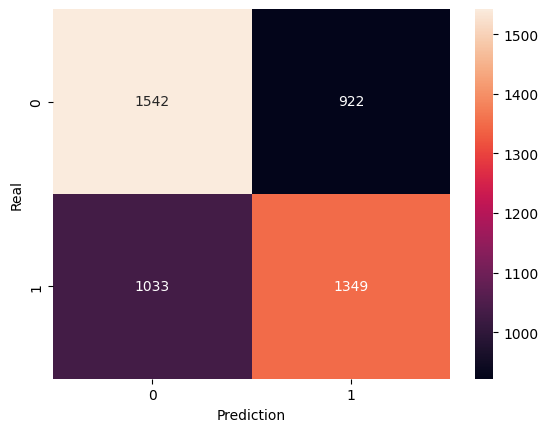

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

The confusion matrix above describes:
*   **True Negative (TN)** - 1542 instances were correctly identified as non-defaulters (repaying the loan).
*   **False Positive (FP)** - 922 instances did not default on the loan, but the model incorrectly predicted that they would default (predicted as defaulters when they actually repaid the loan).
*   **False Negative (FN)** -  1033 instances defaulted on the loan, but the model incorrectly predicted that they would not default (predicted as non-defaulters when they actually defaulted).
*   **True Positive (TP)** - 1349 instances defaulted on the loan, and the model correctly predicted that they would default.


6.1.2 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random Forest Classifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Logistic regression model trained previously
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print(f"ROC AUC: {roc_auc}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2464
         1.0       1.00      1.00      1.00      2382

    accuracy                           1.00      4846
   macro avg       1.00      1.00      1.00      4846
weighted avg       1.00      1.00      1.00      4846

Accuracy: 0.9995872884853487
Precision: 1.0
Recall: 0.9991603694374476
F1-score: 0.9995800083998321
ROC AUC: 0.9995801847187238


The overall performance of this implementation is calculated with the following results:

*   **Accuracy: 0.999**, meaning that the model accurately predicts loan repayment or default approximately 99% of the time.
*   **Precision: 1.0**, meaning that the model predicts that a borrower will repay the loan, it is correct about 100% of the time.
*   **Recall: 0.999**, meaning that the model correctly identifies approximately 99% of the actual loan defaults.
*   **F1-score: 0.999**, the harmonic mean of precision and recall, provides a balanced measure of the model's performance on loan default prediction.
*   **ROC-AUC: 0.999**, a value close to 1 indicates a good model with a high level of separability. This value suggests that the model is excellent at distinguishing between borrowers who will repay their loans and those who will default.

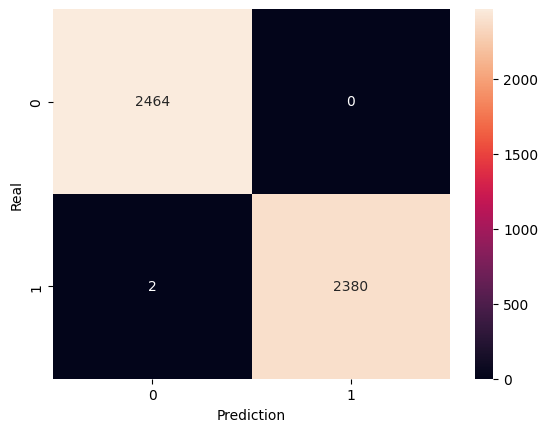

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.ylabel('Real')
plt.xlabel('Prediction');

The confusion matrix above describes:
*   **True Negative (TN)** - 2464 instances were correctly identified as non-defaulters (repaying the loan).
*   **False Positive (FP)** - 0 instances did not default on the loan, but the model incorrectly predicted that they would default (predicted as defaulters when they actually repaid the loan).
*   **False Negative (FN)** -  2 instances defaulted on the loan, but the model incorrectly predicted that they would not default (predicted as non-defaulters when they actually defaulted).
*   **True Positive (TP)** - 2380 instances defaulted on the loan, and the model correctly predicted that they would default.

# **7.0 Conclusion**

In the process of predicitng whether a borrower will default, two different models were experimented with each yielding different performance metrics. The primary metric of interest in this assessment is F1-score, as it is crucial to accurately provide a balanced measure on loan default prediction. However, precision, accuracy, recall, and AUC-ROC are also important to ensure the overall quality of the model.

Upon reviewing the evaluation metrics, Random Forest Classifier stands out as the most effective model for predicting loan repayment. It achieved the highest score in F1-score of 0.999, which indicates that it strikes an excellent balance between precision and recall in identifying loan default cases. This is crucial in a business context, as recognizing loan default on borrowers for companies like MoneyLion is essential for managing financial risks and ensuring sustainable lending practices. Additionally, Random Forest Classifier also demonstrated stronger performance across all metrics, with an accuracy of 0.999, precision of 1.0, recall ratio of 0.999, and AUC-ROC of 0.999. These scores suggest that the model not only excels in identifying loan default but also maintains a high level of overall performance. In conclusion, the proposed Random Forest Classifier model is performing at an acceptable benchmark in predicting loan default, which serves as the main goal of the assessment.



---


# **8.0 Appendix**

*   Runtime: 50s

*   Start date: 6th April 2024 (Saturday)
*   End date: 9th April 2024 (Tuesday)
*   Duration: 4 days

**Convert 'df' to .csv file**

In [ ]:
# Convert df to csv file

df.to_csv('dataset_new.csv', index=False)